In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
user_data = pd.read_csv('../../user_features.csv', index_col = 0)


In [3]:
user_data_top = user_data[user_data['num_businesses'] > 30]
low_variance_feats = []
for feat in user_data_top.columns:
    # print(f'{feat}:\t {user_data_top[feat].mean()} \t {user_data_top[feat].std()}')
    if user_data_top[feat].std() < 0.1:
        low_variance_feats.append(feat)

In [4]:
len(low_variance_feats)

59

In [5]:
user_top_hivar = user_data_top.drop(low_variance_feats, axis = 1)

In [6]:
corr_matrix = user_top_hivar.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [7]:
len(to_drop)

9

In [91]:
for feature in to_drop: 
    print(feature +' , ' +upper[feature].idxmax())
    print(upper[feature].max())

Caterers , Barbeque
0.9595260227263585
Chicken Wings , Barbeque
0.9606372768954673
Delis , Caterers
0.9606000981198175
Desserts , Bakeries
0.9557688111458111
Diners , Delis
0.9604382997210662
Specialty Food , Delis
0.953872685401627
Sports Bars , Chicken Wings
0.964133758238003
Sushi Bars , Japanese
0.9816192065635495
RestaurantsCounterService , Diners
0.9798933339457342


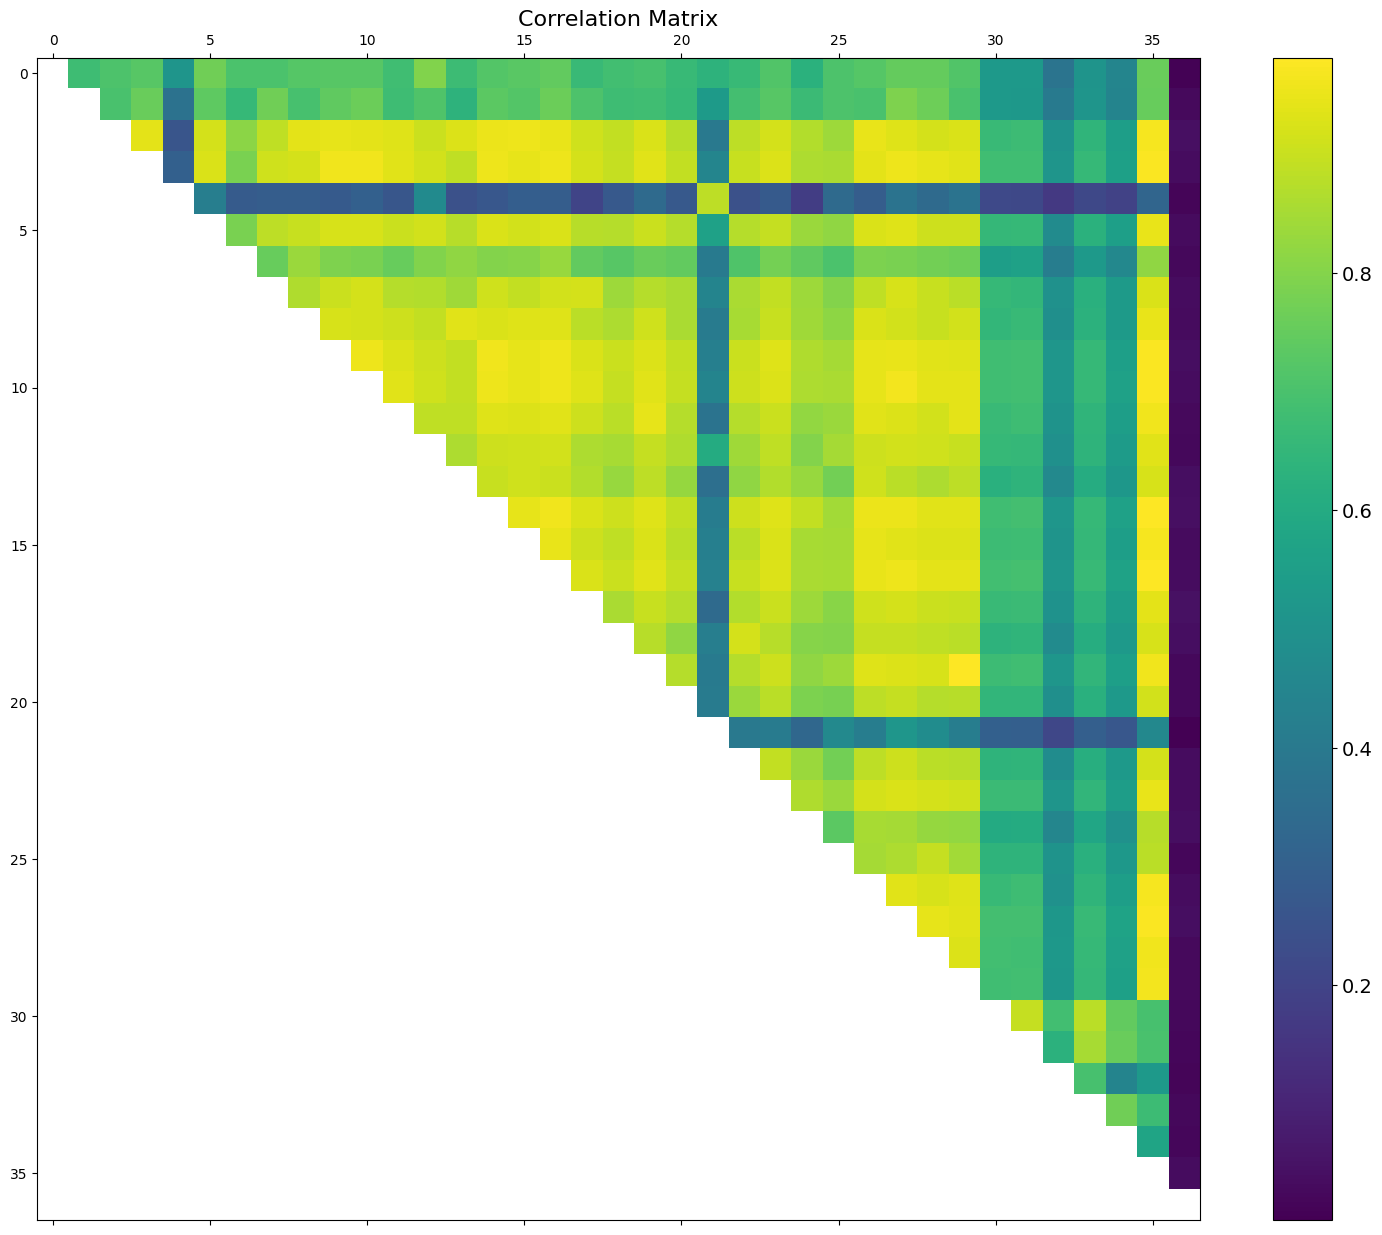

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(upper, fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [145]:
upper

,American (New),American (Traditional),Bakeries,Barbeque,Bars,Beer,Breakfast & Brunch,Burgers,Cafes,Caterers,...,Sports Bars,Steakhouses,Sushi Bars,BusinessAcceptsCreditCards,RestaurantsTakeOut,Alcohol,RestaurantsAttire,GoodForKids,RestaurantsCounterService,num_businesses
American (New),NaN,0.676782,0.709810,0.726076,0.514002,0.769761,0.705490,0.705425,0.723413,0.727941,...,0.749834,0.750954,0.713788,0.532942,0.530520,0.378210,0.509479,0.449352,0.756167,0.008583
American (Traditional),NaN,NaN,0.700637,0.758898,0.370244,0.738387,0.658474,0.768504,0.696917,0.744027,...,0.790975,0.765599,0.698923,0.530362,0.524938,0.404034,0.514021,0.444511,0.755682,0.026739
Bakeries,NaN,NaN,NaN,0.942447,0.258577,0.918673,0.812788,0.886835,0.940815,0.946497,...,0.935619,0.920189,0.927267,0.667706,0.674565,0.502905,0.644771,0.550837,0.969658,0.042584
Barbeque,NaN,NaN,NaN,NaN,0.301174,0.926795,0.783504,0.912319,0.919502,0.959526,...,0.955629,0.943995,0.938975,0.680371,0.682542,0.513714,0.657381,0.557175,0.976862,0.032619
Bars,NaN,NaN,NaN,NaN,NaN,0.419397,0.282347,0.290748,0.290699,0.278028,...,0.374540,0.342024,0.374072,0.219605,0.214777,0.163307,0.213176,0.195094,0.322132,0.013546
Beer,NaN,NaN,NaN,NaN,NaN,NaN,0.783554,0.885228,0.900194,0.921594,...,0.933217,0.906676,0.908591,0.653844,0.659346,0.475129,0.627701,0.554093,0.949641,0.030370
Breakfast & Brunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752636,0.836192,0.791719,...,0.783284,0.772997,0.765714,0.552112,0.563473,0.417154,0.533396,0.457651,0.817763,0.022088
Burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864156,0.905041,...,0.922306,0.898371,0.880079,0.658453,0.651424,0.496112,0.624102,0.536428,0.927857,0.034062
Cafes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921628,...,0.914861,0.899989,0.913820,0.650882,0.660938,0.490944,0.631808,0.534203,0.949683,0.031938
Caterers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.949205,0.937901,0.934759,0.681536,0.683128,0.516184,0.656512,0.555934,0.974273,0.039574


## OPTICS

In [31]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np


In [33]:
# X = StandardScaler().fit_transform(user_top_hivar)
# user_top_hivar_standard = pd.DataFrame(X,columns = user_top_hivar.columns, index = user_top_hivar.index)

In [51]:
user_top_hivar_nonumbus = user_top_hivar.iloc[:,:-2]

In [71]:
clust = OPTICS(cluster_method = 'xi',  xi=0.0001, eps =0.8, min_cluster_size=20)

# Run the fit
clust.fit(user_top_hivar_nonumbus)
labels = clust.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 9975


In [72]:
for val in np.unique(labels): 
    print(f'{val} \t {list(labels).count(val)}')

-1 	 9975
0 	 24
1 	 27
2 	 39
3 	 44


In [83]:
user_clustered = pd.concat([user_top_hivar_nonumbus, pd.Series(labels, index =user_top_hivar_nonumbus.index, name = 'cluster_id' )], axis = 1)

In [85]:
cluster_3 = user_clustered[user_top_hivar['cluster_id'] == 3]

In [86]:
cluster_3.to_csv('largest_cluster.csv')

## Linear Regression on just cluster3

In [24]:
from sklearn.model_selection import train_test_split

In [89]:
cluster_3_users = cluster_3.index

In [110]:
user_bus_final = pd.read_csv('../../user_bus_final.csv', index_col = 0, low_memory = False)

In [107]:
business_data = pd.read_csv('../Business_Related/julia_business_data.csv', index_col = 0, low_memory = False)

In [108]:
business_data = business_data.iloc[:,9:]

In [130]:
chosen_cluster_df = pd.DataFrame()
for index in cluster_3_users:
    row = user_bus_final.loc[index]
    for ranking in [1,2,3,4,5]:
        if row[str(ranking)]== row[str(ranking)]:
            buses =  eval(row[str(ranking)])
            for business in buses: 
                new_data = business_data.loc[business]
                new_data['rating'] = ranking
                chosen_cluster_df = pd.concat([chosen_cluster_df, new_data], axis = 1)
chosen_cluster_df = chosen_cluster_df.transpose()

In [174]:
X_train, X_test,y_train, y_test = train_test_split(chosen_cluster_df.iloc[:,:-1], chosen_cluster_df.iloc[:,-1], test_size=0.1, train_size=0.9, random_state=42, shuffle=True, stratify = chosen_cluster_df.iloc[:,-1])



In [193]:
X_train

,is_American,is_Dessert,is_Bar,"is_Beer,Wine,Spirits",is_Breakfast,is_Coffee & Tea,is_Asian,is_Italian,"is_Healthy,Specialty Food",is_Latin American,is_Mediterranean,is_Western European,is_Slavic Food,is_African,is_Food Markets/Shops
qAn_A-pwh-SDBj6Sjff8Qw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
XQWZQjC73fCTRGWnD18-Eg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AG8T1jIgBvY0T1G3gkp1Jg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tIrKQRlAft3cytlm4khnKQ,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
z5BLSMc92pwbGEqeaUPmDg,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_p-pLonAAzzOSnTLdJMtw,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
841XcQ5w_-8hCZGWRxK7ng,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
gqMRM12j5mder76t3bPxJw,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
chUeS0h9C8KGfyJO2Jqgew,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [194]:
n_samples = 2754
n_classes = 5

print(n_samples/(n_classes * np.bincount(y_train)))

[       inf 3.50828025 1.91916376 0.93673469 0.54212598 0.78016997]


/var/folders/tx/hcj75l151gjcmpfyz6qmnlxm0000gn/T/ipykernel_77386/3858317002.py:4: RuntimeWarning: divide by zero encountered in divide
  print(n_samples/(n_classes * np.bincount(y_train)))


In [256]:
weights = {1:2.5,2:1.9,3:1,4:0.8,5:.8 }

In [259]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0, class_weight = weights, C = 0.1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

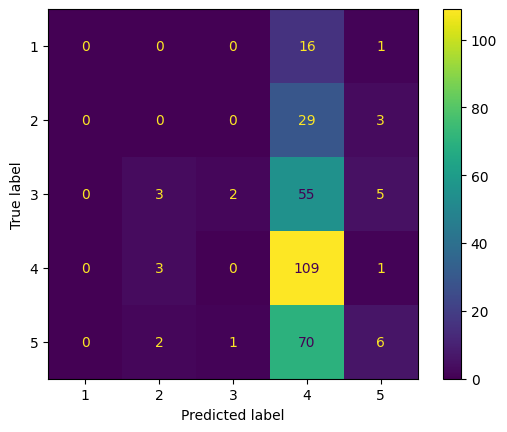

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [177]:
X_test[y_pred == 5].index

Index(['5t-25pkm9ovVcbH3BBIpCw', 'kLqHVKDKErhp4KBOnVkKPQ',
       '06NHXjVHiGKNpZ2XeajVkA', 'ATO_GTUMSEYBZn0v1cqg0g',
       'S57Jpd0ZAv7CEf8EIJopNQ', 'hFfrCMOMVvhDwCTGCcs1aQ',
       'sMhdwnrxQd8NWPCxLKqG2A', 'BxLqgAycWWeq9wFbPh58pg',
       'Uekr58xgdLusfSRGiTk-PQ', 'qmJR2qGwuK-q_05gY2qu9A',
       '2DTkzhmMpv5fIPKheePClA', '8NqrX9MRsjql8lGiuxlmeg',
       'mQvRi0nm84Www71d4qOheQ', '5u_eZ2_GYsPtLuRwAajgzg',
       'WP9GAuhvmUhm8MAxMqhgrQ', 'WoDFTyLtU3RhHPx-7GhQyA',
       'oZFddbA1tlw4CHrLvg4mwg', 'dNC6G1FhDVQA5D58Oyg06g',
       'l4ce2PFU6NWUvJYRZTl6-g'],
      dtype='object')